In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# utilizing 2 differnet datasets
df_1 = pd.read_csv('/content/drive/MyDrive/mail_data.csv', encoding='latin-1')
df_1

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/spam_ham_dataset.csv', encoding='latin-1')
df_2

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df_1.shape

(5572, 2)

In [ ]:
df_2.shape

(5171, 4)

In [ ]:
# cleaning df_1
# Rename relevant columns

# df_1 = df_1[['ï»¿Category', 'Message']]
df_1 = df_1[['Category', 'Message']]
df_1.columns = ['label', 'text']

# Convert labels to binary (1 for spam, 0 for non-spam)
df_1['label'] = df_1['label'].map({'ham': 0, 'spam': 1})

# Display first few rows
df_1

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
print(df_1.isnull().sum())  # Count missing values per column

label    0
text     0
dtype: int64


In [ ]:
print(df_1[df_1.isnull().any(axis=1)])  # Show rows with missing values


Empty DataFrame
Columns: [label, text]
Index: []


In [ ]:
# check for duplicates
df_1.drop_duplicates(subset=['text'], inplace=True)
df_1.shape

(5157, 2)

In [ ]:
# Create a 'cleaned_text' column and clean it step by step
df_1['cleaned_text'] = df_1['text'].str.strip()

# Remove multiple spaces
df_1['cleaned_text'] = df_1['cleaned_text'].str.replace(r'\s+', ' ', regex=True)

# Fix encoding issues (removes symbols like â, Âº, etc.)
df_1['cleaned_text'] = df_1['cleaned_text'].str.encode('ascii', 'ignore').str.decode('utf-8')

In [ ]:
# Replace placeholders
df_1['cleaned_text'] = df_1['cleaned_text'].replace({
    r'&lt;#&gt;': '[NUMBER]',
    r'&lt;URL&gt;': '[URL]',
    r'&lt;DECIMAL&gt;': '[DECIMAL]',
    r'&lt;TIME&gt;': '[TIME]',
    r'&lt;EMAIL&gt;': '[EMAIL]',
    r'&gt;': '',  # Remove greater-than encoding
}, regex=True)

df_1

,label,text,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã¼ b going to esplanade fr home?,Will b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s...","Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like i'd...


In [ ]:
# Checking for placeholders by filtering rows where 'text' column contains '&gt;' ,
placeholder_rows = df_1[df_1['text'].str.contains(r'&gt;', na=False, regex=True)]

# Display the 'text' column from those rows
print(placeholder_rows)

      label                                               text  \
44        0  Great! I hope you like your man well endowed. ...   
51        0  A gram usually runs like  &lt;#&gt; , a half e...   
55        0  Do you know what Mallika Sherawat did yesterda...   
78        0         Does not operate after  &lt;#&gt;  or what   
178       0  Turns out my friends are staying for the whole...   
...     ...                                                ...   
5498      0                 Why did I wake up on my own &gt;:(   
5504      0           Wait . I will msg after  &lt;#&gt;  min.   
5513      0  Yes. Please leave at  &lt;#&gt; . So that at  ...   
5557      0  No. I meant the calculation is the same. That ...   
5559      0  if you aren't here in the next  &lt;#&gt;  hou...   

                                           cleaned_text  
44    Great! I hope you like your man well endowed. ...  
51    A gram usually runs like [NUMBER] , a half eig...  
55    Do you know what Mallika Sh

In [ ]:
# extract statistical features that could help spam classification
df_1['email_length'] = df_1['cleaned_text'].apply(len)  # Total characters
df_1['word_count'] = df_1['cleaned_text'].apply(lambda x: len(x.split()))  # Word count
df_1['uppercase_count'] = df_1['cleaned_text'].apply(lambda x: sum(1 for c in x if c.isupper()))  # Uppercase count
df_1['punctuation_count'] = df_1['cleaned_text'].apply(lambda x: sum(1 for c in x if c in "!$%&*"))  # Punctuation count
df_1['link_count'] = df_1['cleaned_text'].apply(lambda x: x.count("[URL]"))  # Link count

In [ ]:
# balance the amount of spam and non-spam data
# find total number of spam and non spam data
print(df_1['label'].value_counts())

label
0    4516
1     641
Name: count, dtype: int64


In [ ]:
# since there is only 641 spam emails, will randomly choose 641 non-spam emails too
non_spam_emails = df_1[df_1['label'] == 0].sample(n=641, random_state=42)
df_1 = pd.concat([df_1[df_1['label'] == 1], non_spam_emails])
df_1.reset_index(drop=True, inplace=True)
df_1

,label,text,cleaned_text,email_length,word_count,uppercase_count,punctuation_count,link_count
0,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,10,1,0
1,1,FreeMsg Hey there darling it's been 3 week's n...,FreeMsg Hey there darling it's been 3 week's n...,146,32,7,2,0
2,1,WINNER!! As a valued network customer you have...,WINNER!! As a valued network customer you have...,156,26,12,3,0
3,1,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more? U R entitle...,154,29,14,1,0
4,1,"SIX chances to win CASH! From 100 to 20,000 po...","SIX chances to win CASH! From 100 to 20,000 po...",136,26,17,1,0
...,...,...,...,...,...,...,...,...
1277,0,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...,65,13,50,0,0
1278,0,Me fine..absolutly fine,Me fine..absolutly fine,23,3,1,0,0
1279,0,U're welcome... Caught u using broken english ...,U're welcome... Caught u using broken english ...,54,8,2,0,0
1280,0,Really... I tot ur paper ended long ago... But...,Really... I tot ur paper ended long ago... But...,115,25,5,0,0


In [ ]:
# cleaning df_2
# check for duplicates
df_2.drop_duplicates(subset=['text'], inplace=True)
df_2.drop(columns=['Unnamed: 0'], inplace=True)
df_2.reset_index(drop=True, inplace=True)
df_2.shape

(4993, 3)

In [ ]:
df_2_subject = df_2.copy()

In [ ]:
import re
# Function to clean email text
def clean_email(text):
    # Remove 'Subject:' line
    text = re.sub(r"^Subject:.*\n?", "", text, flags=re.IGNORECASE)

    # Remove everything after '- -'
    text = re.split(r"- -", text)[0]

    # Strip leading/trailing spaces
    return text.strip()

#df_2['cleaned_text'] = df_2['text'].apply(clean_email)

# Convert labels to binary (1 for spam, 0 for non-spam)
df_2['label'] = df_2['label'].map({'ham': 0, 'spam': 1})

df_2

,label,text,label_num
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,1,"Subject: photoshop , windows , office . cheap ...",1
4,0,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
4988,0,"Subject: fw : crosstex energy , driscoll ranch...",0
4989,0,Subject: put the 10 on the ft\r\nthe transport...,0
4990,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
4991,0,Subject: industrial worksheets for august 2000...,0


In [ ]:
df_2.drop(columns=['label_num'], inplace=True)

df_2

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...
...,...,...
4988,0,"Subject: fw : crosstex energy , driscoll ranch..."
4989,0,Subject: put the 10 on the ft\r\nthe transport...
4990,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
4991,0,Subject: industrial worksheets for august 2000...


In [ ]:
# Find rows where 'cleaned_text' is blank (empty or NaN)
#blank_rows = df_2[df_2['cleaned_text'].isna() | (df_2['cleaned_text'].str.strip() == '')]
blank_rows = df_2[df_2['text'].isna() | (df_2['text'].str.strip() == '')]

print("Rows with blank 'cleaned_text':")
print(blank_rows)


Rows with blank 'cleaned_text':
Empty DataFrame
Columns: [label, text]
Index: []


In [ ]:
# drop rows with blank 'cleaned_text'
df_2 = df_2[df_2['text'].notna() & df_2['text'].str.strip().astype(bool)]
df_2.reset_index(drop=True, inplace=True)
df_2
df_2.shape

(4993, 2)

In [ ]:
# # extract statistical features that could help spam classification
# df_2['email_length'] = df_2['text'].apply(len)  # Total characters
# df_2['word_count'] = df_2['cleaned_text'].apply(lambda x: len(x.split()))  # Word count
# df_2['uppercase_count'] = df_2['cleaned_text'].apply(lambda x: sum(1 for c in x if c.isupper()))  # Uppercase count
# df_2['punctuation_count'] = df_2['cleaned_text'].apply(lambda x: sum(1 for c in x if c in "!$%&*"))  # Punctuation count
# df_2['link_count'] = df_2['cleaned_text'].apply(lambda x: x.count("[URL]"))  # Link count

In [ ]:
# Extract statistical features that could help spam classification
df_2['email_length'] = df_2['text'].apply(len)  # Total characters
df_2['word_count'] = df_2['text'].apply(lambda x: len(x.split()))  # Word count
df_2['uppercase_count'] = df_2['text'].apply(lambda x: sum(1 for c in x if c.isupper()))  # Uppercase count
df_2['punctuation_count'] = df_2['text'].apply(lambda x: sum(1 for c in x if c in "!$%&*"))  # Punctuation count
df_2['link_count'] = df_2['text'].apply(lambda x: x.count("[URL]"))  # Link count



In [ ]:
df_2

,label,text,email_length,word_count,uppercase_count,punctuation_count,link_count
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,67,1,0,0
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,23,1,0,0
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,550,1,4,0
3,1,"Subject: photoshop , windows , office . cheap ...",404,48,1,0,0
4,0,Subject: re : indian springs\r\nthis deal is t...,336,70,1,0,0
...,...,...,...,...,...,...,...
4988,0,"Subject: fw : crosstex energy , driscoll ranch...",869,196,1,2,0
4989,0,Subject: put the 10 on the ft\r\nthe transport...,534,155,1,0,0
4990,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1114,305,1,2,0
4991,0,Subject: industrial worksheets for august 2000...,573,111,1,1,0


In [ ]:
# balance the amount of spam and non-spam data
# find total number of spam and non spam data
print(df_2['label'].value_counts())

label
0    3531
1    1462
Name: count, dtype: int64


In [ ]:
# since there is only 1379 spam emails, will randomly choose 1379 non-spam emails too
non_spam_emails = df_2[df_2['label'] == 0].sample(n=1379, random_state=42)
df_2 = pd.concat([df_2[df_2['label'] == 1], non_spam_emails])
df_2.reset_index(drop=True, inplace=True)
df_2

,label,text,email_length,word_count,uppercase_count,punctuation_count,link_count
0,1,"Subject: photoshop , windows , office . cheap ...",404,48,1,0,0
1,1,Subject: looking for medication ? we ` re the ...,784,164,1,4,0
2,1,Subject: vocable % rnd - word asceticism\r\nvc...,6922,1203,1,8,0
3,1,Subject: report 01405 !\r\nwffur attion brom e...,337,71,1,3,0
4,1,Subject: vic . odin n ^ ow\r\nberne hotbox car...,395,51,1,0,0
...,...,...,...,...,...,...,...
2836,0,Subject: re : equistar deal tickets\r\nare you...,1282,306,1,0,0
2837,0,"Subject: hpl texoma , meter 9801071 - 05 / 10 ...",732,161,1,0,0
2838,0,Subject: enron / hpl actuals for july 28 - 30 ...,383,103,1,0,0
2839,0,"Subject: fw : "" red , white and blue out ""\r\n...",32258,8862,1,4,0


In [ ]:
#df_2 with subject lines
#apply cleaning steps same as above
df_2_subject['label'] = df_2_subject['label'].map({'ham': 0, 'spam': 1})


# **Random Forest Classifier Baseline Model**

In [ ]:
import numpy as np
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from scipy.sparse import hstack
import pandas as pd
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import scipy.sparse as sp

# Define the statistical feature columns that already exist in the dataset
stat_feature_cols = ['email_length', 'word_count', 'uppercase_count', 'punctuation_count', 'link_count']

# Extract the existing statistical features from the dataframe
X_stats = df_2[stat_feature_cols].values

# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=100, stop_words="english")
X_tfidf = vectorizer.fit_transform(df_2['text'])

# Combine TF-IDF features with existing statistical features
X_combined = sp.hstack((X_tfidf, X_stats))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, df_2['label'], test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)

# Evaluate model on original test set
print("Accuracy on original dataset:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Transform df_1 using the same TF-IDF vectorizer
X_new = vectorizer.transform(df_1['cleaned_text'])

# Extract additional statistical features
X_stats_new = df_1[stat_feature_cols].values

# Combine TF-IDF features with statistical features
assert X_new.shape[0] == X_stats_new.shape[0], "Mismatch between TF-IDF and statistical feature sizes"
X_combined_new = sp.hstack((X_new, X_stats_new))

# Predict using the trained model on new dataset
y_new_pred = rf_model.predict(X_combined_new)

# Evaluate performance on the new dataset
accuracy_new = accuracy_score(df_1['label'], y_new_pred)
report_new = classification_report(df_1['label'], y_new_pred)

# Display accuracy and classification report
print("Accuracy on new dataset:", accuracy_new)
print("Classification Report on new dataset:\n", report_new)

Accuracy on original dataset: 0.9420035149384886
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       274
           1       0.92      0.98      0.95       295

    accuracy                           0.94       569
   macro avg       0.94      0.94      0.94       569
weighted avg       0.94      0.94      0.94       569

Accuracy on new dataset: 0.640405616224649
Classification Report on new dataset:
               precision    recall  f1-score   support

           0       0.60      0.85      0.70       641
           1       0.74      0.43      0.54       641

    accuracy                           0.64      1282
   macro avg       0.67      0.64      0.62      1282
weighted avg       0.67      0.64      0.62      1282



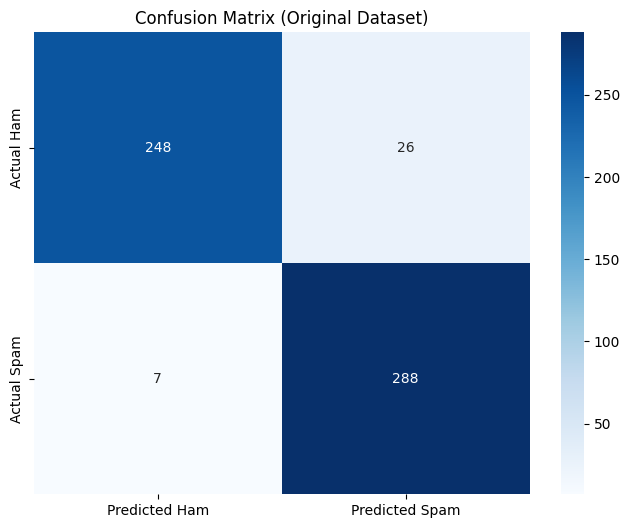

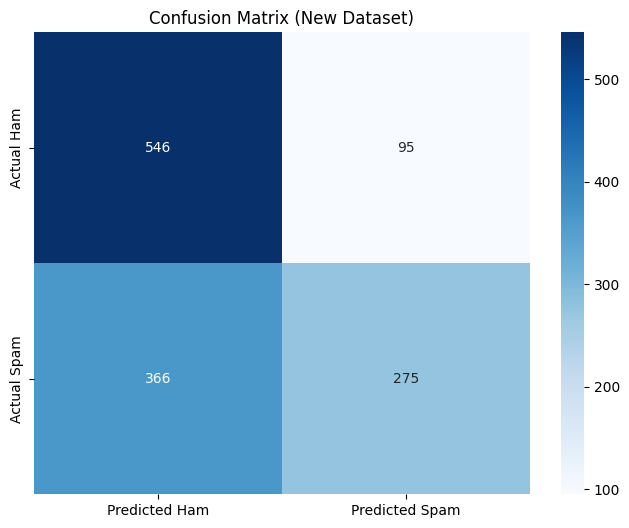

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Predictions and Evaluation (original dataset)
y_pred = rf_model.predict(X_test)

# Confusion Matrix for original dataset
cm_original = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("Confusion Matrix (Original Dataset)")
plt.show()


# Predict using the trained model on new dataset
y_new_pred = rf_model.predict(X_combined_new)

# Confusion Matrix for new dataset
cm_new = confusion_matrix(df_1['label'], y_new_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("Confusion Matrix (New Dataset)")
plt.show()
